# Word2Vec with LSTM:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import os

from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import RegexpTokenizer


from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
#stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Helper Functions for Text cleaning::

In [4]:
import re
def decontracted(phrase):
  """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""

  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"won\’t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)

  phrase = re.sub(r"n\’t", " not", phrase)
  phrase = re.sub(r"\’re", " are", phrase)
  phrase = re.sub(r"\’s", " is", phrase)
  phrase = re.sub(r"\’d", " would", phrase)
  phrase = re.sub(r"\’ll", " will", phrase)
  phrase = re.sub(r"\’t", " not", phrase)
  phrase = re.sub(r"\’ve", " have", phrase)
  phrase = re.sub(r"\’m", " am", phrase)

  return phrase

#processed_text = decontracted(processed_text)
#print(processed_text)

def remove_special_character(phrase, remove_number=False):
  """remove_special_character takes text and removes special charcters.
     ref: https://stackoverflow.com/a/18082370/4084039"""

  phrase = re.sub("\S*\d\S*", "", phrase).strip()
  if remove_number:
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)
  else:
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
  return phrase

# processed_text = remove_special_character(processed_text, True)
# print(processed_text)

def remove_stop_words(text):
    stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', \
                "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', \
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", \
                'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', \
                'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', \
                'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', \
                'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
                'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', \
                'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', \
                'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', \
                'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', \
                'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", \
                'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", \
                'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', \
                "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', \
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", \
                'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])
    return ' '.join(e.lower() for e in text.split() if e.lower() not in stopwords)

# ref: https://gist.github.com/sebleier/554280

# processed_text = ' '.join(e.lower() for e in processed_text.split() if e.lower() not in stopwords)
# print(processed_text)

def lemmatize_text(text_data):
  """lem_text takes text and lemmatize it using WordNetLemmatizer.
     ref: https://stackoverflow.com/a/25535348"""
  lem = WordNetLemmatizer()
  n_text = []
  for word in text_data.split(' '):
    n_word = lem.lemmatize(word, pos='a')
    n_word = lem.lemmatize(n_word, pos='v')
    n_text.append(n_word)

  return ' '.join(n_text)

# processed_text = lem_text(processed_text)
# print(processed_text)

def stem_and_stopwords(text):
    stemmer = nltk.stem.SnowballStemmer('english')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems


def clean_text(text):
    text = decontracted(text)
    text = remove_special_character(text)
    text = remove_stop_words(text)
    text = lemmatize_text(text)
    #text = stem_and_stopwords(text)
    return text


def find_max_list_idx(list):
    list_len = [len(i) for i in list]
    return np.argmax(np.array(list_len))

def desc_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    return words

In [5]:
# Using GoogleCollab:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [6]:
data = pd.read_csv('data.csv')

In [7]:
data.shape

(425, 11)

In [8]:
data.head(2)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


In [9]:
#target_column = 'Potential Accident Level'
target_column = 'Accident Level'
target={'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5}

data['target']=data[target_column].map(target)

In [10]:
df = data[['target', 'Description']]

In [11]:
df.Description = df.Description.apply(clean_text)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df.head(2)

,target,Description
0,0,remove drill rod jumbo maintenance supervisor ...
1,0,activation sodium sulphide pump pip uncouple s...


###Convert target to category::

In [13]:
df['target'].astype('category')

0      0
1      0
2      0
3      0
4      3
      ..
420    0
421    0
422    0
423    0
424    0
Name: target, Length: 425, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

---

In [14]:
max_idx = find_max_list_idx(df['Description'])
print(max_idx)

174


In [15]:
print(len(df['Description'][max_idx]))



622


In [16]:
df['Description'][max_idx]

'level gallery hold activity bolter equipment no operator perform drill first hole support right gable drill end drill rod break leave thread inside drill machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enter corrugate iron central hole rest bar embed shank generate pressure moment operator activate percussion generate movement shank hit palm victim leave hand generate describe injury worker wear safety gloves time accident end corrugate iron contact leave hand shape like cane worker time accident position roof support mesh split set'

In [17]:
MAX_SEQUENCE_LENGTH = len(df['Description'][max_idx])

# Create Word2Vec from gensim::

##Text Clean for Gensim::

In [18]:
desc_lines = list()
lines = df['Description'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    desc_lines.append(words)

In [19]:
len(desc_lines)


425

In [20]:
data['Description'][1]

'During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.'

In [21]:
df['Description'][1]

'activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor late hospital note sulphide solution grams liter'

In [22]:
desc_lines[1]

['activation',
 'sodium',
 'sulphide',
 'pump',
 'pip',
 'uncouple',
 'sulfide',
 'solution',
 'design',
 'area',
 'reach',
 'maid',
 'immediately',
 'make',
 'use',
 'emergency',
 'shower',
 'direct',
 'ambulatory',
 'doctor',
 'late',
 'hospital',
 'note',
 'sulphide',
 'solution',
 'grams',
 'liter']

In [23]:
len(desc_lines)

425

In [24]:
import gensim 

EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=desc_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 2372


In [25]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [26]:
words[10:15]

['centralizer', 'facilitate', 'removal', 'see', 'mechanic']

In [27]:
model.wv.most_similar('mechanic')

[('fragment', 0.9874339699745178),
 ('use', 0.987318217754364),
 ('make', 0.986915111541748),
 ('operator', 0.9858063459396362),
 ('work', 0.9849867820739746),
 ('hand', 0.9846134185791016),
 ('area', 0.98447585105896),
 ('hit', 0.9843685626983643),
 ('right', 0.9843416213989258),
 ('cause', 0.9841146469116211)]

##Load the saved model::

In [28]:
embeddings_index = {}
f = open(os.path.join('', 'embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [29]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(desc_lines)
sequences = tokenizer_obj.texts_to_sequences(desc_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

desc_pad = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

X = desc_pad
print('Shape of Desc tensor:', X.shape)



Found 2372 unique tokens.
Shape of Desc tensor: (425, 622)


In [30]:
y = pd.get_dummies(df['target']).values
print('Shape of label tensor:', y.shape)


Shape of label tensor: (425, 5)


In [31]:
pd.DataFrame(y).value_counts()

0  1  2  3  4
1  0  0  0  0    316
0  1  0  0  0     40
   0  1  0  0     31
      0  1  0     30
         0  1      8
dtype: int64

In [32]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

###Train and Val split:: (90-10)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 1122, shuffle = True)

In [34]:
print('##'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('##'*20, f'\nNumber of rows in test dataset: {x_val.shape[0]}')
print(f'Number of columns in test dataset: {x_val.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_val)))}')

######################################## 
Number of rows in training dataset: 382
Number of columns in training dataset: 622
Number of unique words in training dataset: 2253
######################################## 
Number of rows in test dataset: 43
Number of columns in test dataset: 622
Number of unique words in test dataset: 675


### Model with imblearn::

In [35]:
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:

# sm = SMOTE(random_state = 111, k_neighbors=4)
# X_train_res, y_train_res = sm.fit_sample(X_train_pad, y_train,)

from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=111, categorical_features=[0,1,2,3,4])
X_res, y_res = sm.fit_resample(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
print('Before Sampling: X_train: {}, y_train: {}'.format(X.shape, y.shape))

Before Sampling: X_train: (425, 622), y_train: (425, 5)


In [38]:
print('After Sampling: X: {}, y: {}'.format(X_res.shape, y_res.shape))

After Sampling: X: (1580, 622), y: (1580, 5)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 1122)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1264, 622) (1264, 5)
(316, 622) (316, 5)


In [40]:
pd.DataFrame(y_train).value_counts()

0  1  2  3  4
1  0  0  0  0    261
0  1  0  0  0    254
   0  0  0  1    253
         1  0    249
      1  0  0    247
dtype: int64

In [41]:
pd.DataFrame(y_test).value_counts()

0  1  2  3  4
0  0  1  0  0    69
      0  1  0    67
         0  1    63
   1  0  0  0    62
1  0  0  0  0    55
dtype: int64

In [42]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector



In [43]:
embedding_matrix.shape

(2373, 100)

##TODO:: Avging on top of embedding_matrix -> To happen at sentence level (check GL learning material Session#2)

data_list = list()
for comp in df['Consumer complaint narrative']:
    sentence = np.zeros(300)
    count = 0
    for w in complaint_to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)
    --> case_study.ipynb

In [44]:
print(num_words)


2373


### The above model was overfitting, so increase bias: Add drop out layers::

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# Model#1:
model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# model.add(Embedding(num_words, EMBEDDING_DIM, 
#                     input_length=MAX_SEQUENCE_LENGTH))
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
#Accuracy: 39.87%
# array([[12,  7, 10,  2,  0],
#        [ 2,  5,  9,  4,  0],
#        [ 5,  6, 12, 12,  2],
#        [ 0,  2,  9, 18,  4],
#        [ 0,  0,  8, 13, 16]])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 622, 100)          237300    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 618, 128)          64128     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 618, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 433,657
Trainable params: 196,357
Non-trainable params: 237,300
_________________________________________________________________
None


In [59]:

h = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val), verbose=2, shuffle=True)


Epoch 1/5
10/10 - 39s - loss: 1.6074 - accuracy: 0.1891 - val_loss: 1.5149 - val_accuracy: 0.8140
Epoch 2/5
10/10 - 36s - loss: 1.5931 - accuracy: 0.2144 - val_loss: 1.4082 - val_accuracy: 0.8605
Epoch 3/5
10/10 - 36s - loss: 1.5485 - accuracy: 0.2975 - val_loss: 1.4094 - val_accuracy: 0.4419
Epoch 4/5
10/10 - 36s - loss: 1.4665 - accuracy: 0.3782 - val_loss: 1.5996 - val_accuracy: 0.2558
Epoch 5/5
10/10 - 36s - loss: 1.4020 - accuracy: 0.3877 - val_loss: 1.3683 - val_accuracy: 0.5581


###Evaluation:

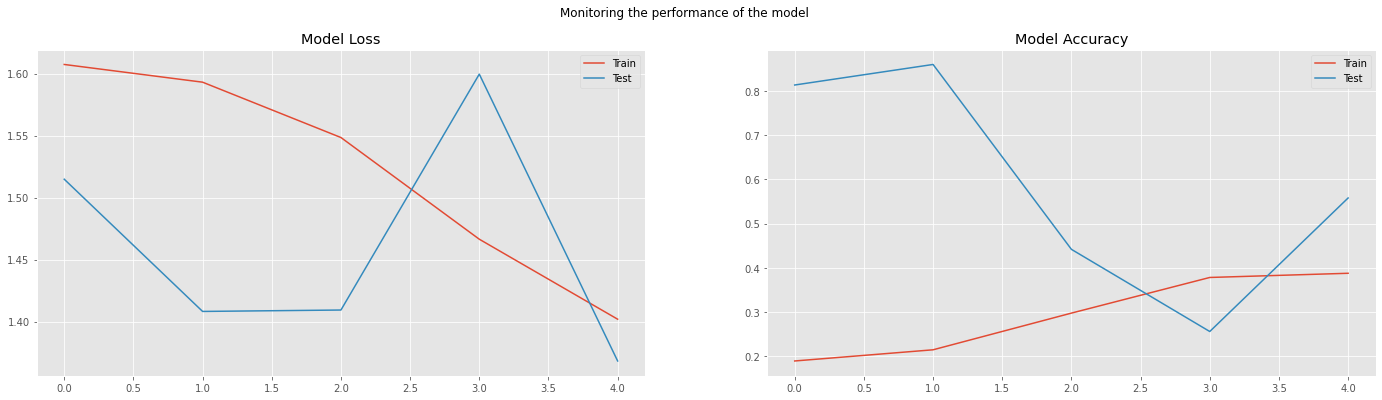

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6))
f.suptitle('Monitoring the performance of the model')

loss = 'loss'
val_loss = 'val_loss'
accuracy = 'accuracy'
val_accuracy = 'val_accuracy'

ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h.history[accuracy], label = 'Train')
ax2.plot(h.history[val_accuracy], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [61]:
print('Testing...')
score, acc = model.evaluate(x_val, y_val, batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
5/5 [==============================] - 1s 117ms/step - loss: 1.3683 - accuracy: 0.5581
Test score: 1.368272066116333
Test accuracy: 0.5581395626068115
Accuracy: 55.81%


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_proba(X_test, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


3/3 [==============================] - 2s 503ms/step
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        55
           1       0.30      0.11      0.16        62
           2       0.36      0.58      0.45        69
           3       0.57      0.06      0.11        67
           4       0.51      0.84      0.63        63

    accuracy                           0.41       316
   macro avg       0.42      0.41      0.35       316
weighted avg       0.42      0.41      0.35       316



In [63]:
print(classification_report(y_test_bool, y_pred_bool, labels=[0,1, 2, 3, 4] ))

              precision    recall  f1-score   support

           0       0.35      0.45      0.39        55
           1       0.30      0.11      0.16        62
           2       0.36      0.58      0.45        69
           3       0.57      0.06      0.11        67
           4       0.51      0.84      0.63        63

    accuracy                           0.41       316
   macro avg       0.42      0.41      0.35       316
weighted avg       0.42      0.41      0.35       316



In [64]:
confusion_matrix(y_test_bool, y_pred_bool)

array([[25,  6, 20,  0,  4],
       [29,  7, 19,  2,  5],
       [ 9,  7, 40,  0, 13],
       [ 9,  3, 22,  4, 29],
       [ 0,  0,  9,  1, 53]])

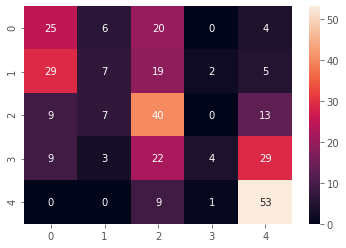

In [65]:
sns.heatmap(confusion_matrix(y_test_bool, y_pred_bool), annot=True)

In [66]:
report = classification_report(y_test_bool, y_pred_bool, output_dict=True)

In [67]:
from sklearn.metrics import multilabel_confusion_matrix

In [68]:
multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=[0,1, 2, 3, 4]  )

array([[[214,  47],
        [ 30,  25]],

       [[238,  16],
        [ 55,   7]],

       [[177,  70],
        [ 29,  40]],

       [[246,   3],
        [ 63,   4]],

       [[202,  51],
        [ 10,  53]]])

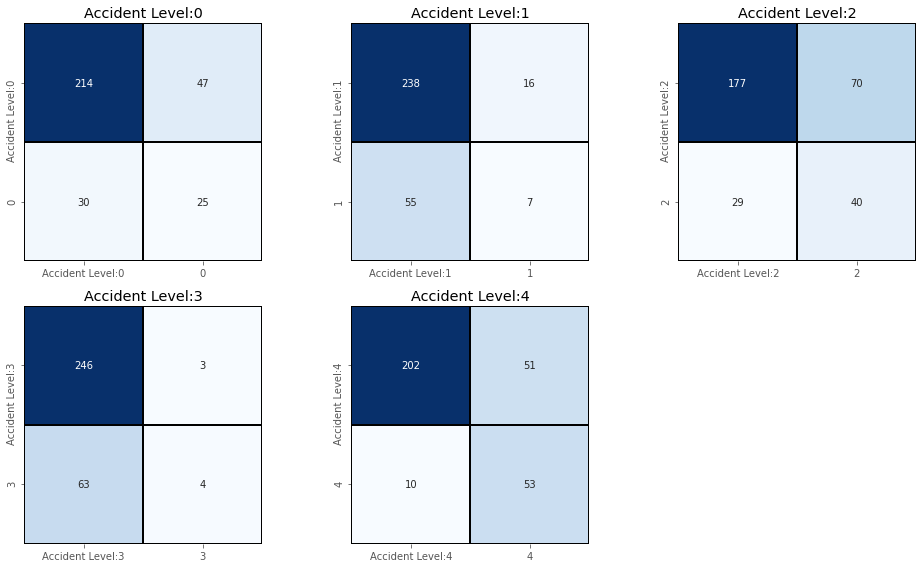

In [69]:
import seaborn as sns
labels = [0,1,2,3,4]
confusion = multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=labels)

# Plot confusion matrix 
fig = plt.figure(figsize = (14, 8))
for i, (label, matrix) in enumerate(zip(labels, confusion)):
    plt.subplot(f'23{i+1}')
    labels = [f'Accident Level:{label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(labels[0])

plt.tight_layout()
plt.show()



---



---

